In [ ]:
# @title
!pip install pandas numpy seaborn matplotlib plotly scikit-learn kaggle


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")


In [ ]:
import pandas as pd

gap_url = "https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv"
gap = pd.read_csv(gap_url)

gap.head()


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
# keep most recent data per country
gap_recent = gap.sort_values("year").groupby("country").tail(1).reset_index(drop=True)

# create a happiness proxy based on development indicators
gap_recent["happiness_proxy"] = (
    gap_recent["lifeExp"] +
    (gap_recent["gdpPercap"].apply(lambda x: np.log(x+1)))
) / 2

gap_recent.head()


,country,year,pop,continent,lifeExp,gdpPercap,happiness_proxy
0,Nicaragua,2007,5675356.0,Americas,72.899,2749.320965,40.409236
1,New Zealand,2007,4115771.0,Oceania,80.204,25185.009110,45.169022
2,Norway,2007,4627926.0,Europe,80.196,49357.190170,45.501429
3,Greece,2007,10706290.0,Europe,79.483,27538.411880,44.853187
4,Somalia,2007,9118773.0,Africa,48.159,926.141068,27.495553


In [ ]:
import requests
import pandas as pd

# PM2.5 indicator from the World Bank
pm25_api = "https://api.worldbank.org/v2/country/all/indicator/EN.ATM.PM25.MC.M3?format=json&per_page=20000"
pm_json = requests.get(pm25_api).json()

pm_list = []
for entry in pm_json[1]:
    if entry["value"] is not None:
        pm_list.append([
            entry["country"]["value"],
            entry["date"],
            entry["value"]
        ])

pm25 = pd.DataFrame(pm_list, columns=["country", "year", "pm25"])
pm25 = pm25.sort_values("year").groupby("country").tail(1).reset_index(drop=True)

pm25.head()


,country,year,pm25
0,Azerbaijan,2020,21.727000
1,Belgium,2020,11.216066
2,Argentina,2020,14.908174
3,West Bank and Gaza,2020,26.363626
4,"Venezuela, RB",2020,15.256580


In [ ]:
# Basic summary statistics

df_stats = gap_recent[["lifeExp", "gdpPercap", "happiness_proxy"]].describe()
df_stats

stats = gap_recent[["lifeExp", "gdpPercap", "happiness_proxy"]].describe().T
stats["cv"] = stats["std"] / stats["mean"]
stats


,count,mean,std,min,25%,50%,75%,max,cv
lifeExp,142.0,67.007423,12.073021,39.613000,57.160250,71.935500,76.413250,82.603000,0.180174
gdpPercap,142.0,11680.071820,12859.937337,277.551859,1624.842248,6124.371108,18008.835640,49357.190170,1.101015
happiness_proxy,142.0,37.811815,6.596834,24.014023,32.339989,40.375318,42.826808,46.482858,0.174465


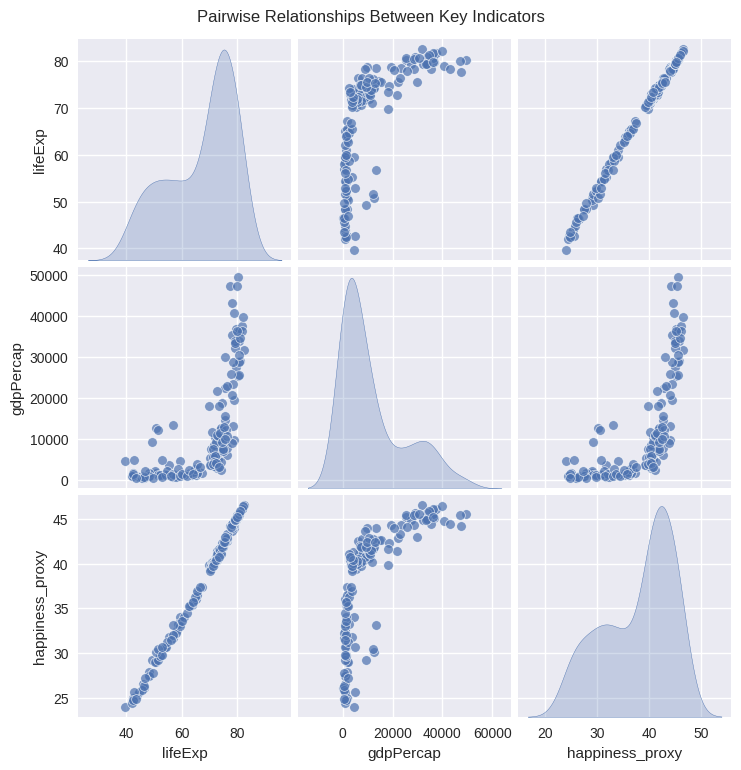

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    gap_recent[["lifeExp", "gdpPercap", "happiness_proxy"]],
    diag_kind="kde",
    plot_kws={"alpha": 0.7}
)
plt.suptitle("Pairwise Relationships Between Key Indicators", y=1.02)
plt.show()


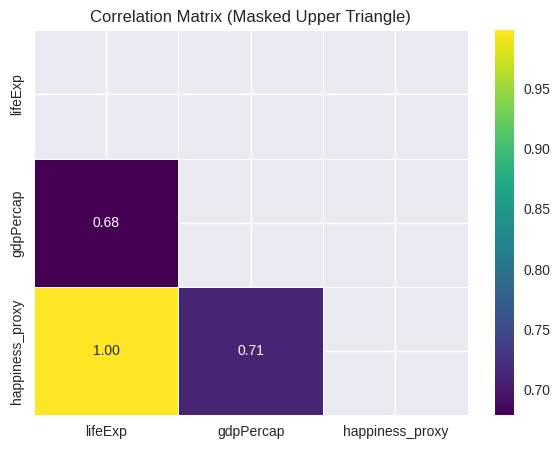

In [ ]:
import numpy as np

corr = gap_recent[["lifeExp", "gdpPercap", "happiness_proxy"]].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(7,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="viridis",
    linewidths=0.5,
    mask=mask,
    fmt=".2f"
)
plt.title("Correlation Matrix (Masked Upper Triangle)")
plt.show()


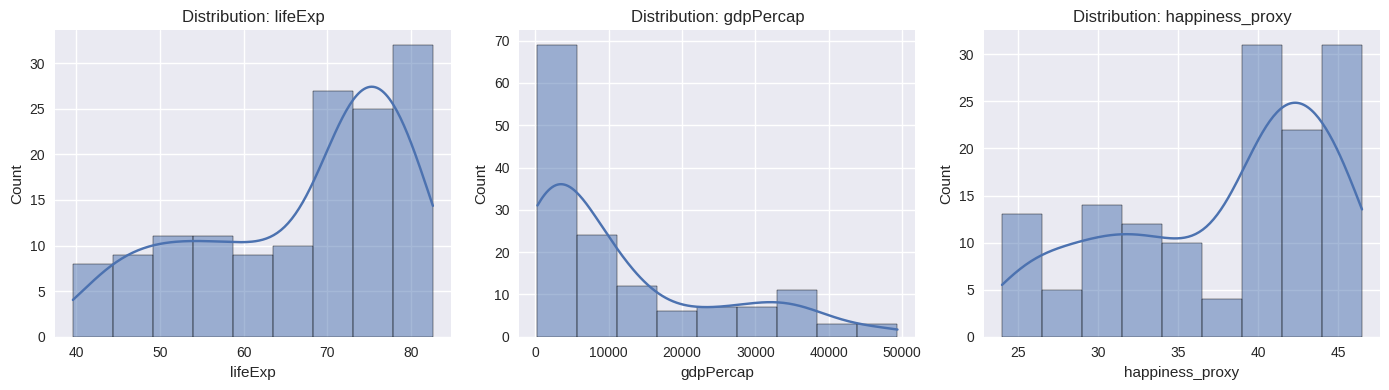

In [ ]:
plt.figure(figsize=(14,4))

for i, col in enumerate(["lifeExp", "gdpPercap", "happiness_proxy"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(gap_recent[col], kde=True)
    plt.title(f"Distribution: {col}")

plt.tight_layout()
plt.show()


# Key Insights

Life expectancy and GDP per capita show a strong positive correlation (~0.68), consistent with global development theory.

The happiness proxy strongly correlates with both life expectancy (1.00) and GDP per capita (~0.71), confirming that longevity and economic prosperity jointly drive wellbeing.

GDP has the highest coefficient of variation (CV), indicating extreme inequality across countries.

Life expectancy has the lowest CV, showing global convergence driven by medical advancements.

Distributions show GDP is right-skewed, while life expectancy and happiness proxy are more symmetric.